In [44]:
import pandas as pd

In [45]:
df = pd.read_csv('/workspaces/EDA_3/data/raw/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [47]:
print(len(df.drop_duplicates()))

1337


In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.shape

(1337, 7)

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

## ANÁLISIS UNIVARIANTE

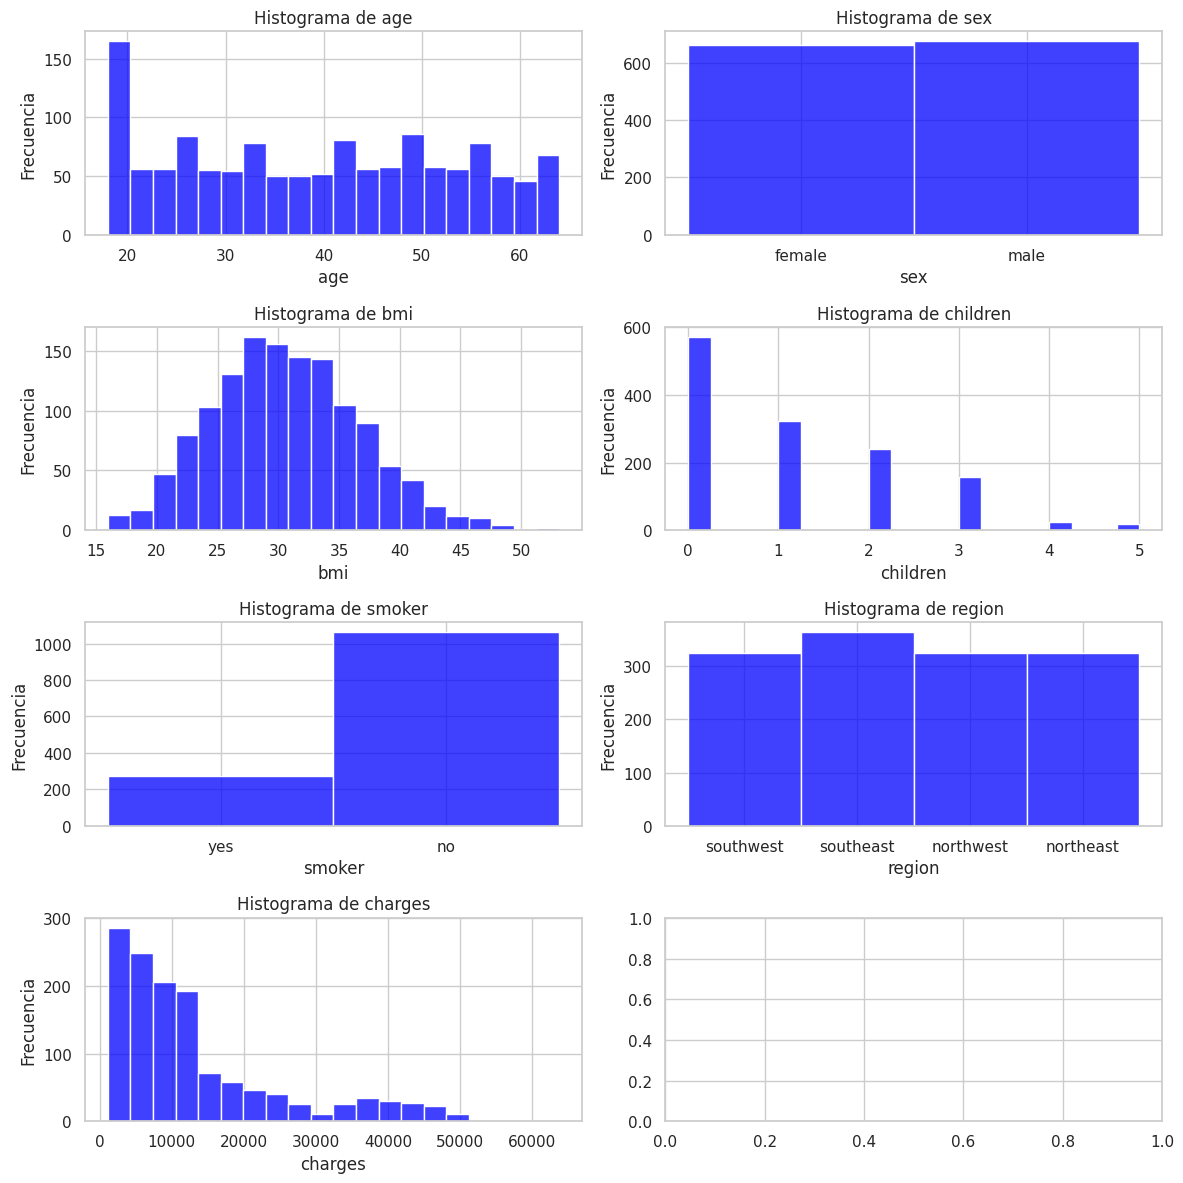

In [51]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Obtener el número de columnas en el DataFrame
num_columns = len(df.columns)

# Establecer el número de subgráficos por fila
num_subplots_per_row = 2

# Calcular el número total de filas necesarias
num_rows = (num_columns + num_subplots_per_row - 1) // num_subplots_per_row

# Crear subgráficos
fig, axes = plt.subplots(num_rows, num_subplots_per_row, figsize=(12, 3 * num_rows))

# Aplanar la matriz de subgráficos para facilitar la iteración
axes = axes.flatten()

# Iterar por cada columna y crear un histograma
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.histplot(df[column], kde=False, bins=20, color='blue', ax=ax)  # Puedes ajustar los parámetros según tus preferencias
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

In [52]:
# Creamos una función que factoriza los valores insertados
def factor(column):
    df[column] = pd.factorize(df[column])[0]

# Creamos otra función que nos almacenará el nombre de las etiquetas en una lista
tag_list = []
def tags (column):
    tag_string = pd.factorize(df[column])[1]
    tag_list.append(tag_string)

# Creamos una lista de las columnas categóricas
to_factor = ["sex", "smoker", "region"]

# Iteramos sobre esta lista para pasar cada elemento a la función
for i in to_factor:
    tags(i)   

for i in to_factor:
    factor(i)


df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


AttributeError: 'list' object has no attribute 'tolist'

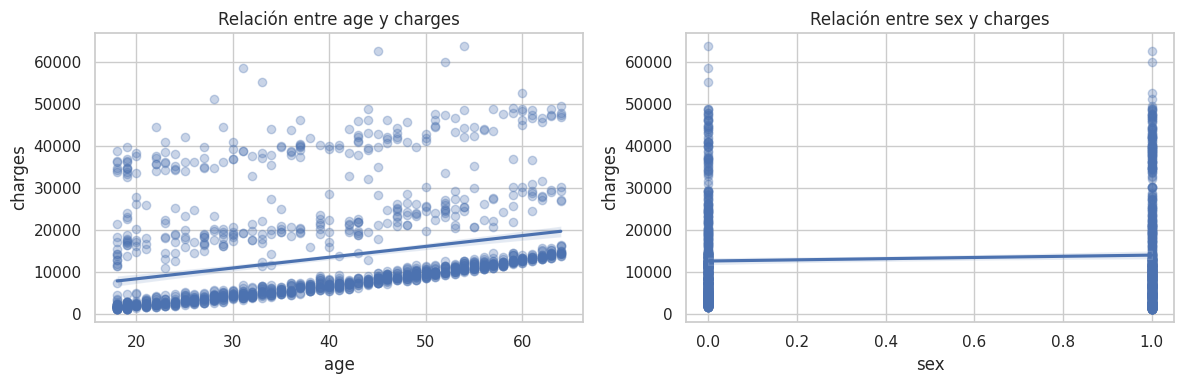

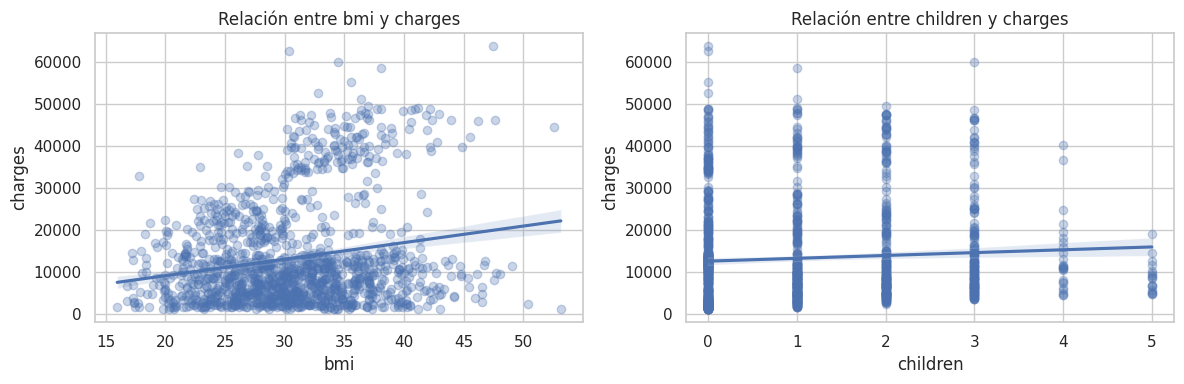

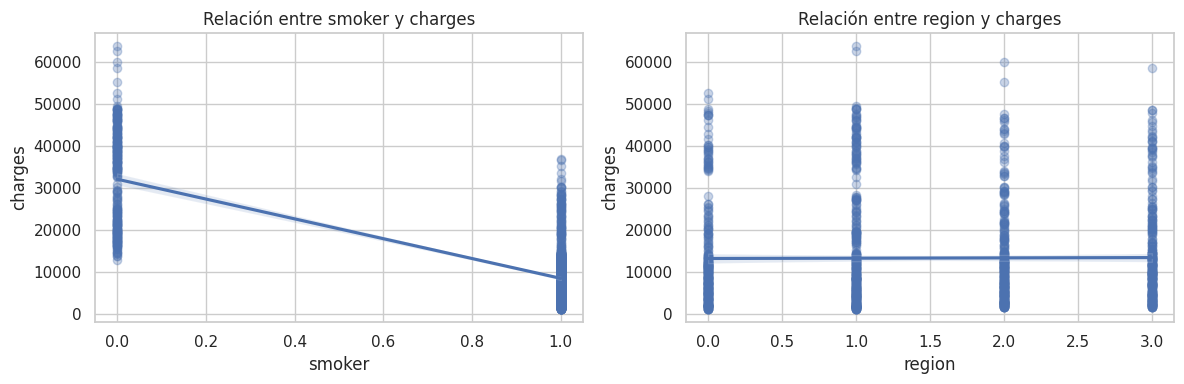

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_column = 'charges'

feature_columns = [col for col in df.columns if col != target_column]

# Dividir las columnas en pares
column_pairs = [(feature_columns[i], feature_columns[i+1]) for i in range(0, len(feature_columns), 2)]

# Iterar a través de los pares de columnas y trazar regplots
for pair in column_pairs:
    # Crear una figura con dos subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Iterar sobre las dos columnas del par
    for i, feature_column in enumerate(pair):
        # Crear un gráfico de dispersión con línea de regresión
        sns.regplot(x=feature_column, y=target_column, data=df, scatter_kws={'alpha':0.3}, ax=axes[i])
        
        # Configuración del título y etiquetas
        axes[i].set_title(f'Relación entre {feature_column} y {target_column}')
        axes[i].set_xlabel(feature_column)
        axes[i].set_ylabel(target_column)
    
    # Ajustar el diseño y mostrar el gráfico
    plt.tight_layout()
    plt.show()

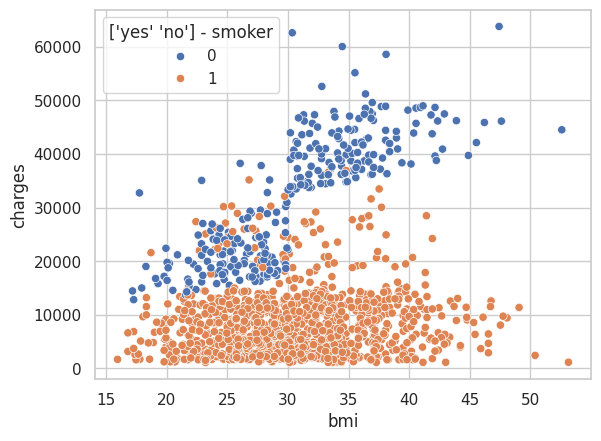

In [60]:
tag_smoker = tag_list[1]
tag_content = tag_smoker.values
sns.scatterplot(data = df, x = "bmi", y = "charges", hue = "smoker")
plt.legend(title=f"{tag_content} - {df['smoker'].name}") 
plt.show()

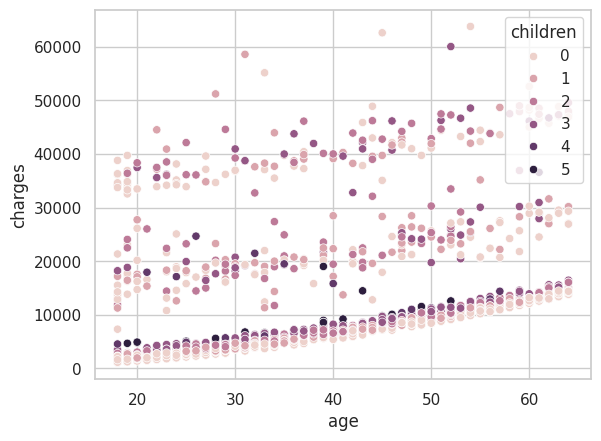

In [65]:

sns.scatterplot(data = df, x = "age", y = "charges", hue = "children")

plt.show()